In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
ecom= pd.read_csv("Train.csv")
ecom.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Exploration and Analysis

In [4]:
ecom.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Text(0.5, 1.0, 'Shipment Method Plot')

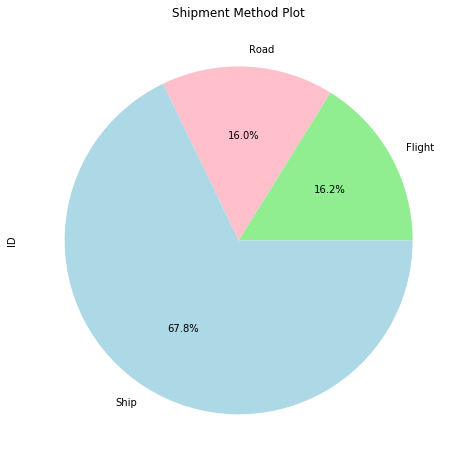

In [53]:
plt.figure(figsize=(8,8))
ecom.groupby(["Mode_of_Shipment"])["ID"].count().plot.pie(autopct="%.1f%%", colors=["LightGreen", "pink", "LightBlue"])
                                                                                    
plt.title("Shipment Method Plot")

In [70]:

a=ecom.groupby(["Product_importance", "Reached.on.Time_Y.N"])["ID"].count()
a.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

Product_importance  Reached.on.Time_Y.N
high                0                      35.021097
                    1                      64.978903
low                 0                      40.721163
                    1                      59.278837
medium              0                      40.954985
                    1                      59.045015
Name: ID, dtype: float64

In [78]:
total

10999.0

Text(0.5, 1.0, 'Product Importance by Arrival Time')

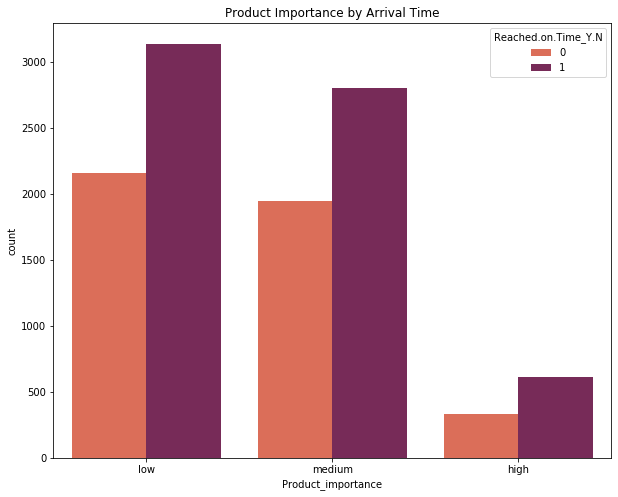

In [85]:
plt.figure(figsize=(10,8))
g=sns.countplot(x="Product_importance", data=ecom, hue="Reached.on.Time_Y.N", palette="rocket_r")
plt.title("Product Importance by Arrival Time")


Text(0.5, 1.0, 'Warehouse Block')

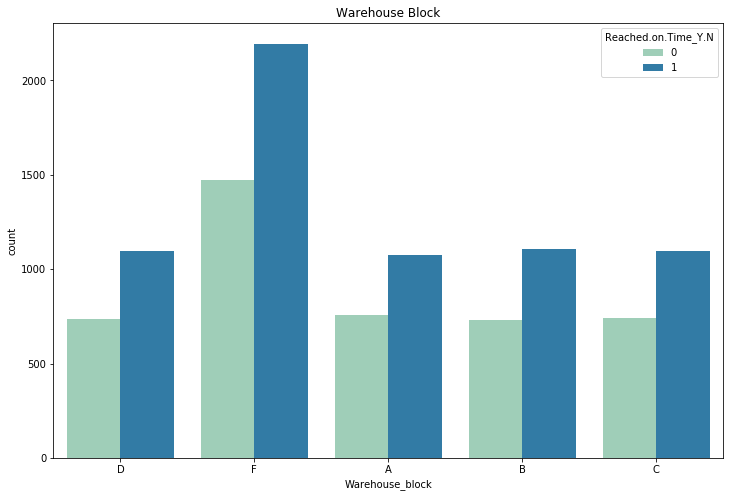

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x="Warehouse_block", data=ecom, hue="Reached.on.Time_Y.N", palette="YlGnBu")
plt.title("Warehouse Block")



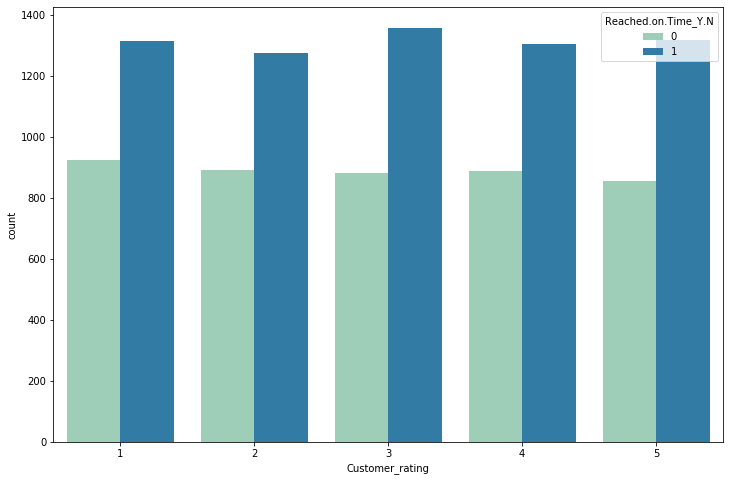

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="Customer_rating", data=ecom, hue="Reached.on.Time_Y.N", palette="YlGnBu")

Text(0.5, 1.0, 'Cost of Products for not on time')

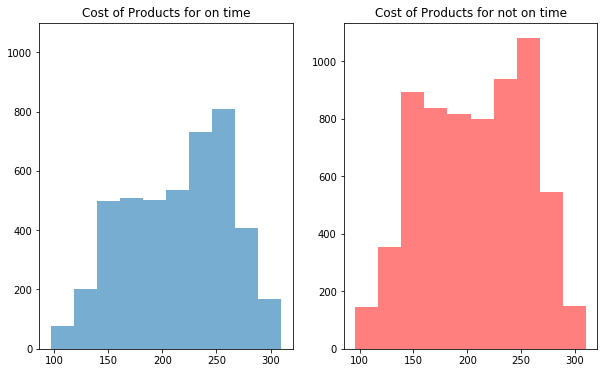

In [43]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
g=ecom[ecom["Reached.on.Time_Y.N"]==0] #product reached on time
plt.hist(g["Cost_of_the_Product"], alpha=0.6)
plt.title("Cost of Products for on time")
plt.ylim((0,1100))

plt.subplot(1,2,2)
a=ecom[ecom["Reached.on.Time_Y.N"]==1]
plt.hist(a["Cost_of_the_Product"], color="red", alpha=0.5)
plt.title("Cost of Products for not on time")


Text(0.5, 1.0, 'Prior Purchases for not on time')

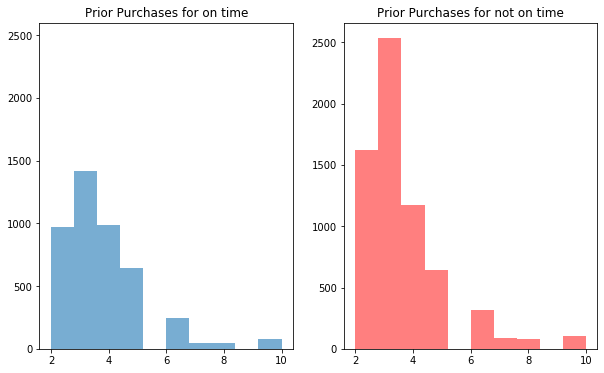

In [58]:

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
g=ecom[ecom["Reached.on.Time_Y.N"]==0] #product reached on time
plt.hist(g["Prior_purchases"], alpha=0.6)
plt.title("Prior Purchases for on time")
plt.ylim((0,2600))

plt.subplot(1,2,2)
a=ecom[ecom["Reached.on.Time_Y.N"]==1]
plt.hist(a["Prior_purchases"], color="red", alpha=0.5)
plt.title("Prior Purchases for not on time")


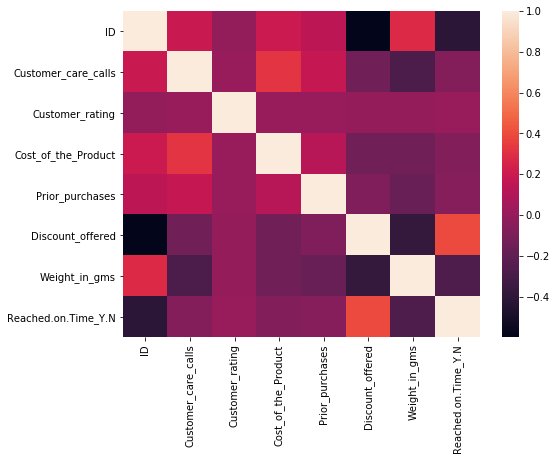

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(ecom.corr())

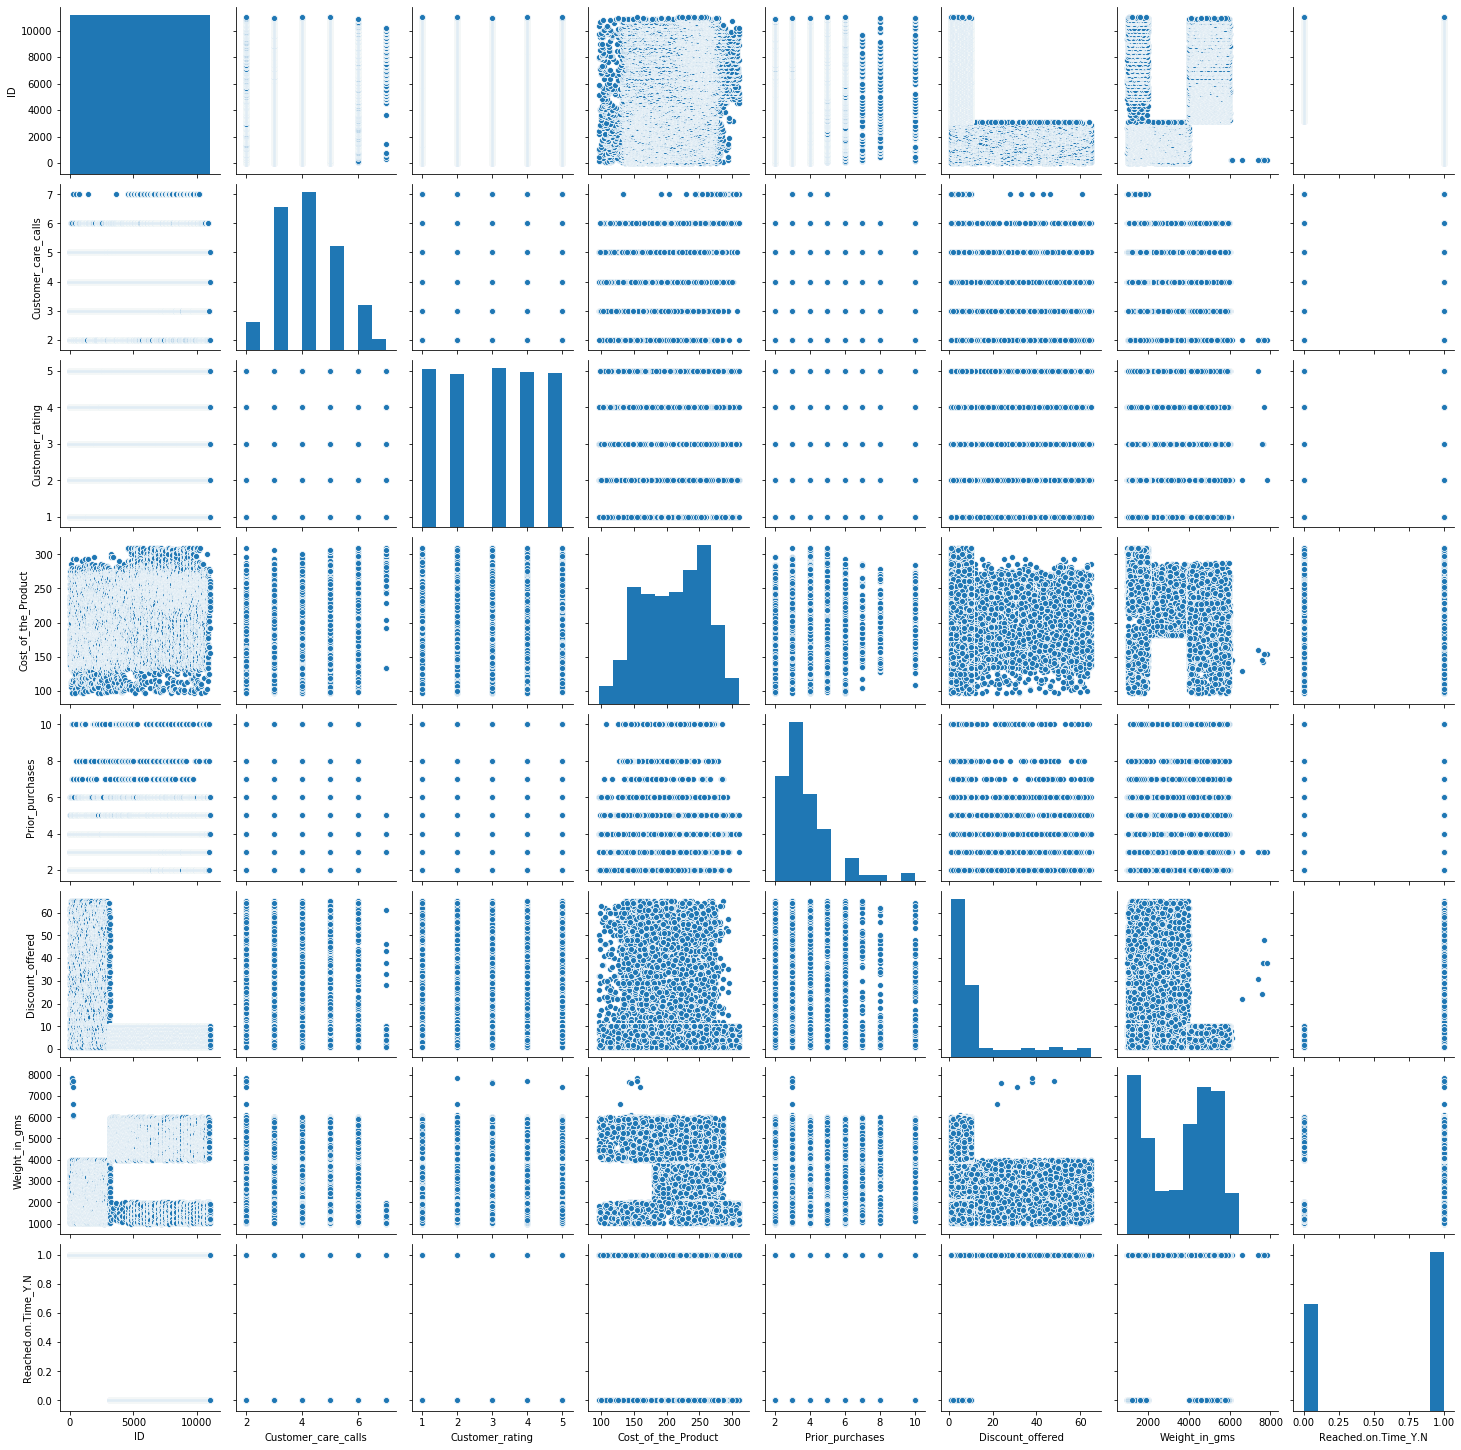

In [87]:
sns.pairplot(ecom)

## Data Cleaning

In [94]:
ecom.head()
method=pd.get_dummies(ecom["Mode_of_Shipment"], drop_first=True)
importance=pd.get_dummies(ecom["Product_importance"], drop_first=True)
gender=pd.get_dummies(ecom["Gender"],drop_first=True)
warehouse=pd.get_dummies(ecom["Warehouse_block"], drop_first=True)

ecom=pd.concat([ecom, method, importance,gender, warehouse ], axis=1)
ecom.drop(["Mode_of_Shipment", "Product_importance", "Gender","ID", "Warehouse_block"], axis=1, inplace=True)
ecom.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Road,Ship,low,medium,M,B,C,D,F
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,0,1,0
1,4,5,216,2,59,3088,1,0,0,1,0,1,0,0,0,1
2,2,2,183,4,48,3374,1,0,0,1,0,1,0,0,0,0
3,3,3,176,4,10,1177,1,0,0,0,1,1,1,0,0,0
4,2,2,184,3,46,2484,1,0,0,0,1,0,0,1,0,0


## Splitting data into train data and test data and standardize data.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [105]:
X=ecom.drop(["Reached.on.Time_Y.N"], axis=1)
Y=ecom["Reached.on.Time_Y.N"]

#standardize
scaler=StandardScaler()
scaler.fit(X)
scaled_features=scaler.transform(X)
df_feat=pd.DataFrame(scaled_features, columns=X.columns)

#split data 
X_train, X_test, y_train, y_test=train_test_split(df_feat, Y, test_size=0.3, random_state=101 )



## Logistic Regression

In [106]:
log_reg=sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.595876
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 7699
Model:                           Logit   Df Residuals:                     7684
Method:                            MLE   Df Model:                           14
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                  0.1163
Time:                         11:28:42   Log-Likelihood:                -4587.7
converged:                        True   LL-Null:                       -5191.2
Covariance Type:             nonrobust   LLR p-value:                4.927e-249
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Customer_care_calls    -0.0738      0.028     -2.626      0.009      -0.129      -0.019
Customer_rating         0.0148      0.025      0.587      0.557      -0.034       0.064
Cost_of_the_Product    -0.0914      0.027     -3.352      0.001      -0.145      -0.038
Prior_purchases        -0.1383      0.027     -5.096      0.000      -0.192      -0.085
Discount_offered        0.8589      0.037     23.177      0.000       0.786       0.932
Weight_in_gms          -0.3917      0.030    -13.219      0.000      -0.450      -0.334
Road                   -0.0316      0.032     -0.982      0.326      -0.095       0.032
Ship                   -0.0208      0.032     -0.653      0.514      -0.083       0.042
low                    -0.1719      0.047     -3.654      0.000      -0.264      -0.080
medium                 -0.1669      0.047     -3.559      0.000      -0.259      -0.075
M                       0.0230      0.025      0.914      0.361      -0.026       0.072
B                       0.0534      0.033      1.634      0.102      -0.011       0.117
C                       0.0457      0.033      1.402      0.161      -0.018       0.110
D                       0.0477      0.032      1.472      0.141      -0.016       0.111
F                       0.0692      0.036      1.930      0.054      -0.001       0.139
=======================================================================================
"""

In [117]:
predictions=log_reg.predict(X_test)
def pred (predicts):
    if predicts>0.5:
        return 1
    else:
        return 0

predictions_lr=predictions.apply(lambda x: pred(x))

print(confusion_matrix(y_test, predictions_lr, normalize="true"))
print("\n")
print(classification_report(y_test, predictions_lr))

[[0.9512012  0.0487988 ]
 [0.52947154 0.47052846]]


              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1332
           1       0.93      0.47      0.63      1968

    accuracy                           0.66      3300
   macro avg       0.74      0.71      0.66      3300
weighted avg       0.78      0.66      0.65      3300



**Let's drop costumer rating,M ,ship and roadsince p- score is very high.**

In [122]:
X=ecom.drop(["Reached.on.Time_Y.N", "Customer_rating", "Ship", "Road", "M"], axis=1)
Y=ecom["Reached.on.Time_Y.N"]

#standardize
scaler=StandardScaler()
scaler.fit(X)
scaled_features=scaler.transform(X)
df_feat=pd.DataFrame(scaled_features, columns=X.columns)

#split data 
X_train, X_test, y_train, y_test=train_test_split(df_feat, Y, test_size=0.3, random_state=101 )

log_reg_2=sm.Logit(y_train, X_train).fit()
log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.596017
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 7699
Model:                           Logit   Df Residuals:                     7688
Method:                            MLE   Df Model:                           10
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                  0.1161
Time:                         11:40:36   Log-Likelihood:                -4588.7
converged:                        True   LL-Null:                       -5191.2
Covariance Type:             nonrobust   LLR p-value:                1.188e-252
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Customer_care_calls    -0.0733      0.028     -2.609      0.009      -0.128      -0.018
Cost_of_the_Product    -0.0907      0.027     -3.331      0.001      -0.144      -0.037
Prior_purchases        -0.1388      0.027     -5.116      0.000      -0.192      -0.086
Discount_offered        0.8588      0.037     23.180      0.000       0.786       0.931
Weight_in_gms          -0.3914      0.030    -13.214      0.000      -0.449      -0.333
low                    -0.1721      0.047     -3.659      0.000      -0.264      -0.080
medium                 -0.1670      0.047     -3.562      0.000      -0.259      -0.075
B                       0.0534      0.033      1.635      0.102      -0.011       0.117
C                       0.0457      0.033      1.401      0.161      -0.018       0.110
D                       0.0475      0.032      1.467      0.143      -0.016       0.111
F                       0.0694      0.036      1.936      0.053      -0.001       0.140
=======================================================================================
"""

In [123]:
predictions_2=log_reg_2.predict(X_test)
def pred (predicts):
    if predicts>0.5:
        return 1
    else:
        return 0

predictions_lr_2=predictions_2.apply(lambda x: pred(x))

print(confusion_matrix(y_test, predictions_lr_2, normalize="true"))
print("\n")
print(classification_report(y_test, predictions_lr_2))

[[0.9527027  0.0472973 ]
 [0.52693089 0.47306911]]


              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1332
           1       0.94      0.47      0.63      1968

    accuracy                           0.67      3300
   macro avg       0.74      0.71      0.66      3300
weighted avg       0.78      0.67      0.66      3300



**We see a little bit of improvement but not as much as we want. When dropping the parameters with higher p-score, we incerase the accuracy by 1%.**

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)
predictions_log=model.

## SVM

In [124]:
from sklearn.svm import SVC

X=ecom.drop(["Reached.on.Time_Y.N"], axis=1)
Y=ecom["Reached.on.Time_Y.N"]

#standardize
scaler=StandardScaler()
scaler.fit(X)
scaled_features=scaler.transform(X)
df_feat=pd.DataFrame(scaled_features, columns=X.columns)

#split data 
X_train, X_test, y_train, y_test=train_test_split(df_feat, Y, test_size=0.3, random_state=101 )



model_svm=SVC()
model_svm.fit(X_train, y_train)
svm_predictions=model_svm.predict(X_test)
print(confusion_matrix(y_test, svm_predictions, normalize="true"))
print("\n")
print(classification_report(y_test, svm_predictions))

[[0.71921922 0.28078078]
 [0.38922764 0.61077236]]


              precision    recall  f1-score   support

           0       0.56      0.72      0.63      1332
           1       0.76      0.61      0.68      1968

    accuracy                           0.65      3300
   macro avg       0.66      0.66      0.65      3300
weighted avg       0.68      0.65      0.66      3300



## Catboost

In [125]:
from catboost import CatBoostClassifier

model_cat=CatBoostClassifier(verbose=False)
model_cat.fit(X_train, y_train)
cat_predictions=model_cat.predict(X_test)

print(confusion_matrix(y_test, cat_predictions, normalize="true"))
print("\n")
print(classification_report(y_test, cat_predictions))

[[0.74024024 0.25975976]
 [0.37601626 0.62398374]]


              precision    recall  f1-score   support

           0       0.57      0.74      0.64      1332
           1       0.78      0.62      0.69      1968

    accuracy                           0.67      3300
   macro avg       0.68      0.68      0.67      3300
weighted avg       0.70      0.67      0.67      3300



In [126]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

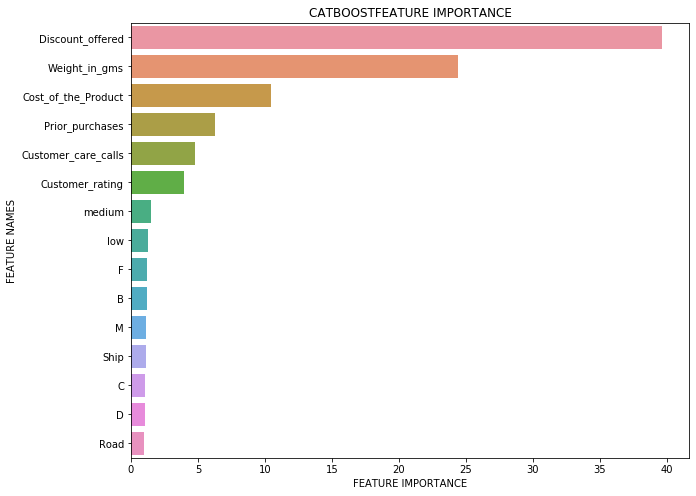

In [127]:
plot_feature_importance(model_cat.get_feature_importance(),X_train.columns,'CATBOOST')